In [27]:
import os
import shutil
import random
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


from PIL import Image, UnidentifiedImageError
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

In [12]:
!wget --no-check-certificate "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" -O "/tmp/cats-and-dogs.zip"

--2022-12-11 21:02:43--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.221.200.188
Connecting to download.microsoft.com (download.microsoft.com)|23.221.200.188|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: '/tmp/cats-and-dogs.zip'

     0K .......... .......... .......... .......... ..........  0%  286K 47m0s
    50K .......... .......... .......... .......... ..........  0%  347K 42m49s
   100K .......... .......... .......... .......... ..........  0%  114K 67m39s
   150K .......... .......... .......... .......... ..........  0% 74,4M 50m47s
   200K .......... .......... .......... .......... ..........  0%  102M 40m39s
   250K .......... .......... .......... .......... ..........  0%  100M 33m54s
   300K .......... .......... .......... .......... ..........  0% 58,0M 29m5s

622950K .......... .......... .......... .......... .......... 77%  102M 13s
623000K .......... .......... .......... .......... .......... 77% 33,9M 13s
623050K .......... .......... .......... .......... .......... 77% 28,5M 13s
623100K .......... .......... .......... .......... .......... 77% 22,7M 13s
623150K .......... .......... .......... .......... .......... 77% 34,6M 13s
623200K .......... .......... .......... .......... .......... 77% 34,9M 13s
623250K .......... .......... .......... .......... .......... 77% 24,9M 13s
623300K .......... .......... .......... .......... .......... 77% 29,0M 13s
623350K .......... .......... .......... .......... .......... 77% 32,0M 13s
623400K .......... .......... .......... .......... .......... 77% 69,5M 13s
623450K .......... .......... .......... .......... .......... 77% 18,5M 13s
623500K .......... .......... .......... .......... .......... 77% 21,9M 13s
623550K .......... .......... .......... .......... .......... 77% 16,8M 13s

In [13]:
def get_valid(file_path):
    correct_files = []
    for name in os.listdir(file_path):
        try:
            img = Image.open(file_path + "/" + name)
            correct_files.append(name)
        except UnidentifiedImageError:
            pass
    return correct_files

In [14]:
local_zip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
classes = ['Cat', 'Dog']
original_cat_path = '/tmp/PetImages/Cat'
original_dog_path = '/tmp/PetImages/Dog'
original_cat = get_valid(original_cat_path)
original_dog = get_valid(original_dog_path)
random.seed(101)

random.shuffle(original_cat)
random.shuffle(original_dog)
size = min(len(original_cat), len(original_dog))
train_size = int(np.floor(0.7 * size))

valid_size = int(np.floor(0.2 * size))
test_size = size - train_size - valid_size
base_directory = 'dataset'
os.mkdir(base_directory)
type_datasets = ['train', 'valid', 'test']
directories = {}

for type_dataset in type_datasets:
    directory = os.path.join(base_directory, type_dataset)
    os.mkdir(directory)
    for name_class in classes:
        animal = os.path.join(directory, name_class)
        os.mkdir(animal)
        directories[f'{type_dataset}_{name_class}'] = animal+'/'
index = 0

for name_cat, name_dog in zip(original_cat, original_dog):
        if index <= train_size:
            type_of_dataset = 'train'
        elif train_size < index <= (train_size + valid_size):
            type_of_dataset = 'valid'
        elif (train_size + valid_size) < index <= (train_size + valid_size + test_size):
            type_of_dataset = 'test'
        shutil.copyfile(src=(original_cat_path + '/' +name_cat), dst=(directories[f'{type_of_dataset}_Cat']+name_cat))
        shutil.copyfile(src=(original_dog_path + '/' + name_dog), dst=(directories[f'{type_of_dataset}_Dog']+name_dog))
        index += 1

print(f'Dog - train: {len(os.listdir(directories["train_Dog"]))}\tCat - train: {len(os.listdir(directories["train_Cat"]))}')
print(f'Dog - valid: {len(os.listdir(directories["valid_Dog"]))}\tCat - valid: {len(os.listdir(directories["valid_Cat"]))}')
print(f'Dog - test:  {len(os.listdir(directories["test_Dog"]))}\tCat - test:  {len(os.listdir(directories["test_Cat"]))}')

D:\Kodilla\kurs_pythona\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Dog - train: 8750	Cat - train: 8750
Dog - valid: 2499	Cat - valid: 2499
Dog - test:  1250	Cat - test:  1250


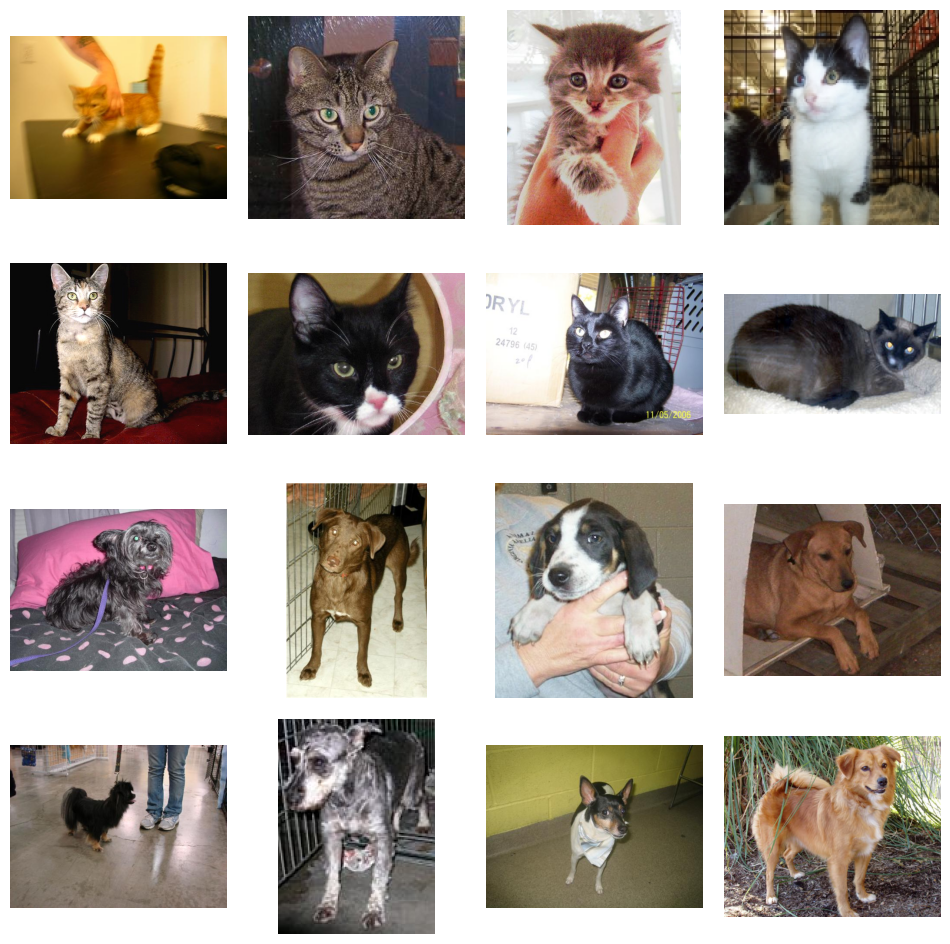

In [15]:
fig = plt.figure(figsize = (12, 12))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i, element in enumerate(os.listdir(os.path.join(directories["train_Cat"]))[:8]):
    ax = fig.add_subplot(4, 4, i+1)
    img = Image.open(directories["train_Cat"]+element)
    ax.imshow(img)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

for i, element in enumerate(os.listdir(os.path.join(directories["train_Dog"]))[:8]):
    ax = fig.add_subplot(4, 4, i+9)
    img = Image.open(directories["train_Dog"]+element)
    ax.imshow(img)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

In [16]:
img_width, img_height = 150, 150
train_data_dir = 'dataset/train/'
validation_data_dir = 'dataset/valid/'
epochs = 1000
batch_size = 64
steps_per_epoch = train_size // batch_size
validation_steps = valid_size // batch_size
patience = 5
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                                                        target_size=(img_height, img_width),
                                                        batch_size=batch_size, class_mode='binary')
train_datagen_augmentation = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rotation_range=30,
                                   horizontal_flip=True)
train_generator_augmentation = train_datagen_augmentation.flow_from_directory(train_data_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size, class_mode='binary')

Found 17500 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.
Found 17500 images belonging to 2 classes.


In [17]:
models = []
os.mkdir("history")
os.mkdir("charts")

In [18]:
model_baseline = Sequential()
model_baseline.add(Flatten(input_shape=(150, 150, 3)))
model_baseline.add(Dense(units=1, activation='sigmoid'))
model_baseline.compile(loss='binary_crossentropy',
                       optimizer=RMSprop(learning_rate=1e-4),
                       metrics=['accuracy'])
model_baseline.summary()
models.append("baseline")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 1)                 67501     
                                                                 
Total params: 67,501
Trainable params: 67,501
Non-trainable params: 0
_________________________________________________________________


In [19]:
es = EarlyStopping(patience=patience, monitor='val_accuracy', restore_best_weights=True)

In [20]:
history_baseline = model_baseline.fit_generator(train_generator,
                                                steps_per_epoch=steps_per_epoch,
                                                epochs=epochs,
                                                validation_data=validation_generator,
                                                validation_steps=validation_steps,
                                                callbacks=[es])
history_baseline_df = pd.DataFrame(history_baseline.history)
history_baseline_csv_file = 'history/history_baseline.csv'

with open(history_baseline_csv_file, mode='w') as f:
    history_baseline_df.to_csv(f)

C:\Users\lukpy\AppData\Local\Temp\ipykernel_7700\1783667163.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_baseline = model_baseline.fit_generator(train_generator,


Epoch 1/1000
136/136 [==============================] - 28s 162ms/step - loss: 1.0088 - accuracy: 0.4985 - val_loss: 0.8261 - val_accuracy: 0.5008
Epoch 2/1000
136/136 [==============================] - 24s 177ms/step - loss: 0.9303 - accuracy: 0.5195 - val_loss: 0.9545 - val_accuracy: 0.4928
Epoch 3/1000
136/136 [==============================] - 25s 183ms/step - loss: 0.9173 - accuracy: 0.5247 - val_loss: 1.0914 - val_accuracy: 0.5080
Epoch 4/1000
136/136 [==============================] - 25s 186ms/step - loss: 0.9161 - accuracy: 0.5292 - val_loss: 0.6939 - val_accuracy: 0.5689
Epoch 5/1000
136/136 [==============================] - 28s 204ms/step - loss: 0.9145 - accuracy: 0.5287 - val_loss: 0.7862 - val_accuracy: 0.5280
Epoch 6/1000
136/136 [==============================] - 27s 197ms/step - loss: 0.9111 - accuracy: 0.5330 - val_loss: 1.1474 - val_accuracy: 0.5028
Epoch 7/1000
136/136 [==============================] - 27s 202ms/step - loss: 0.9027 - accuracy: 0.5355 - val_loss: 0

In [31]:
model_simple_1 = Sequential()
model_simple_1.add(Conv2D(filters=10, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model_simple_1.add(MaxPooling2D(2, 2))
model_simple_1.add(Flatten())
model_simple_1.add(Dense(units=1, activation='sigmoid'))
model_simple_1.compile(loss='binary_crossentropy',
                       optimizer='adam',
                       metrics=['accuracy'])
model_simple_1.summary()
models.append("simple_1")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 10)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 54760)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 54761     
                                                                 
Total params: 55,041
Trainable params: 55,041
Non-trainable params: 0
_________________________________________________________________


In [32]:
history_simple_1 = model_simple_1.fit_generator(train_generator,
                                                steps_per_epoch=steps_per_epoch,
                                                epochs=epochs,
                                                validation_data=validation_generator,
                                                validation_steps=validation_steps,
                                                callbacks=[es])

history_simple_1_df = pd.DataFrame(history_simple_1.history)
history_simple_1_csv_file = 'history/history_simple_1.csv'

with open(history_simple_1_csv_file, mode='w') as f:
    history_simple_1_df.to_csv(f)

Epoch 1/1000


C:\Users\lukpy\AppData\Local\Temp\ipykernel_7700\370971209.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_simple_1 = model_simple_1.fit_generator(train_generator,


136/136 [==============================] - 58s 427ms/step - loss: 0.6985 - accuracy: 0.5984 - val_loss: 0.6263 - val_accuracy: 0.6575
Epoch 2/1000
136/136 [==============================] - 82s 602ms/step - loss: 0.6095 - accuracy: 0.6685 - val_loss: 0.6266 - val_accuracy: 0.6450
Epoch 3/1000
106/136 [======================>.......] - ETA: 11s - loss: 0.5715 - accuracy: 0.7087

D:\Kodilla\kurs_pythona\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))


136/136 [==============================] - 59s 432ms/step - loss: 0.5713 - accuracy: 0.7106 - val_loss: 0.6315 - val_accuracy: 0.6567
Epoch 4/1000
136/136 [==============================] - 59s 433ms/step - loss: 0.5469 - accuracy: 0.7247 - val_loss: 0.5798 - val_accuracy: 0.6991
Epoch 5/1000
136/136 [==============================] - 59s 433ms/step - loss: 0.5122 - accuracy: 0.7501 - val_loss: 0.5664 - val_accuracy: 0.7131
Epoch 6/1000
136/136 [==============================] - 62s 458ms/step - loss: 0.4868 - accuracy: 0.7702 - val_loss: 0.5680 - val_accuracy: 0.7107
Epoch 7/1000
136/136 [==============================] - 67s 496ms/step - loss: 0.4714 - accuracy: 0.7820 - val_loss: 0.5789 - val_accuracy: 0.7027
Epoch 8/1000
136/136 [==============================] - 63s 459ms/step - loss: 0.4499 - accuracy: 0.7932 - val_loss: 0.5821 - val_accuracy: 0.7103
Epoch 9/1000
136/136 [==============================] - 76s 561ms/step - loss: 0.4290 - accuracy: 0.8099 - val_loss: 0.5592 - val_a

In [33]:
model_simple_2 = Sequential()
model_simple_2.add(Conv2D(filters=10, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(150, 150, 3)))
model_simple_2.add(MaxPooling2D(2, 2))
model_simple_2.add(Flatten())
model_simple_2.add(Dense(units=1, activation='sigmoid'))
model_simple_2.compile(loss='binary_crossentropy',
                       optimizer='adam',
                       metrics=['accuracy'])
model_simple_2.summary()
models.append("simple_2")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 150, 150, 10)      280       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 10)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 56250)             0         
                                                                 
 dense_2 (Dense)             (None, 1)                 56251     
                                                                 
Total params: 56,531
Trainable params: 56,531
Non-trainable params: 0
_________________________________________________________________


In [34]:
history_simple_2 = model_simple_2.fit_generator(train_generator,
                                                steps_per_epoch=steps_per_epoch,
                                                epochs=epochs,
                                                validation_data=validation_generator,
                                                validation_steps=validation_steps,
                                                callbacks=[es])

history_simple_2_df = pd.DataFrame(history_simple_2.history)
history_simple_2_csv_file = 'history/history_simple_2.csv'

with open(history_simple_2_csv_file, mode='w') as f:
    history_simple_2_df.to_csv(f)

Epoch 1/1000


C:\Users\lukpy\AppData\Local\Temp\ipykernel_7700\2000361384.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_simple_2 = model_simple_2.fit_generator(train_generator,


136/136 [==============================] - 40s 294ms/step - loss: 0.7226 - accuracy: 0.5813 - val_loss: 0.6424 - val_accuracy: 0.6242
Epoch 2/1000
136/136 [==============================] - 44s 323ms/step - loss: 0.6030 - accuracy: 0.6683 - val_loss: 0.6028 - val_accuracy: 0.6895
Epoch 3/1000
136/136 [==============================] - 43s 317ms/step - loss: 0.5592 - accuracy: 0.7162 - val_loss: 0.5865 - val_accuracy: 0.6951
Epoch 4/1000
136/136 [==============================] - 43s 319ms/step - loss: 0.5122 - accuracy: 0.7532 - val_loss: 0.5623 - val_accuracy: 0.7183
Epoch 5/1000
136/136 [==============================] - 44s 321ms/step - loss: 0.4834 - accuracy: 0.7738 - val_loss: 0.6210 - val_accuracy: 0.6887
Epoch 6/1000
136/136 [==============================] - 44s 320ms/step - loss: 0.4634 - accuracy: 0.7815 - val_loss: 0.5305 - val_accuracy: 0.7388
Epoch 7/1000
136/136 [==============================] - 46s 342ms/step - loss: 0.4354 - accuracy: 0.8031 - val_loss: 0.5862 - val_a

In [35]:
train_datagen_augmentation = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rotation_range=30,
                                   horizontal_flip=True)

train_generator_augmentation = train_datagen_augmentation.flow_from_directory(train_data_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size, class_mode='binary')


Found 17500 images belonging to 2 classes.


In [36]:
from tensorflow.keras.applications import VGG16

vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
vgg16.trainable = True

set_trainable = False
for layer in vgg16.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

for layer in vgg16.layers:
    print(f'layer_name: {layer.name:13} trainable: {layer.trainable}')

model_4 = Sequential()
model_4.add(vgg16)
model_4.add(Flatten())
model_4.add(Dropout(0.5))
model_4.add(Dense(256, activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(128, activation='relu'))
model_4.add(Dense(units=1, activation='sigmoid'))
model_4.compile(loss='binary_crossentropy',
                       optimizer=RMSprop(lr=1e-4),
                       metrics=['accuracy'])
model_4.summary()
models.append("model_4")

58900480/58889256 [==============================] - 2s 0us/step
layer_name: input_1       trainable: False
layer_name: block1_conv1  trainable: False
layer_name: block1_conv2  trainable: False
layer_name: block1_pool   trainable: False
layer_name: block2_conv1  trainable: False
layer_name: block2_conv2  trainable: False
layer_name: block2_pool   trainable: False
layer_name: block3_conv1  trainable: False
layer_name: block3_conv2  trainable: False
layer_name: block3_conv3  trainable: False
layer_name: block3_pool   trainable: False
layer_name: block4_conv1  trainable: False
layer_name: block4_conv2  trainable: False
layer_name: block4_conv3  trainable: False
layer_name: block4_pool   trainable: False
layer_name: block5_conv1  trainable: True
layer_name: block5_conv2  trainable: True
layer_name: block5_conv3  trainable: True
layer_name: block5_pool   trainable: True
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Outpu

D:\Kodilla\kurs_pythona\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [38]:
history_model_4 = model_4.fit_generator(train_generator_augmentation,
                                        steps_per_epoch=steps_per_epoch,
                                        epochs=1,
                                        validation_data=validation_generator,
                                        validation_steps=validation_steps,
                                        callbacks=[es])

history_model_4_df = pd.DataFrame(history_model_4.history)
history_model_4_csv_file = 'history/history_model_4.csv'

with open(history_model_4_csv_file, mode='w') as f:
    history_model_4_df.to_csv(f)

C:\Users\lukpy\AppData\Local\Temp\ipykernel_7700\659105080.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_model_4 = model_4.fit_generator(train_generator_augmentation,


136/136 [==============================] - 1205s 9s/step - loss: 0.3669 - accuracy: 0.8372 - val_loss: 0.2047 - val_accuracy: 0.9195


In [46]:
model_3_2 = Sequential()

# Block 1
model_3_2.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same',kernel_regularizer='l2', input_shape=(150,150,3)))
model_3_2.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer='l2'))
model_3_2.add(MaxPooling2D(pool_size=(2, 2)))

# Block 2
model_3_2.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer='l2'))
model_3_2.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer='l2'))
model_3_2.add(MaxPooling2D(pool_size=(2, 2)))

# Block 3
model_3_2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer='l2'))
model_3_2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer='l2'))
model_3_2.add(MaxPooling2D(pool_size=(2, 2)))

# Block 4
model_3_2.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer='l2'))
model_3_2.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer='l2'))
model_3_2.add(MaxPooling2D(pool_size=(2, 2)))

# Block 5
model_3_2.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer='l2'))
model_3_2.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer='l2'))
model_3_2.add(MaxPooling2D(pool_size=(2, 2)))
model_3_2.add(Flatten())
model_3_2.add(Dropout(0.5))
model_3_2.add(Dense(256, activation='relu', kernel_regularizer='l2'))
model_3_2.add(Dropout(0.5))
model_3_2.add(Dense(128, activation='relu', kernel_regularizer='l2'))
model_3_2.add(Dense(units=1, activation='sigmoid'))
model_3_2.compile(loss='binary_crossentropy',
                       optimizer=RMSprop(lr=1e-4),
                       metrics=['accuracy'])
model_3_2.summary()
models.append("model_3_2")

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 conv2d_47 (Conv2D)          (None, 150, 150, 16)      2320      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 conv2d_49 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                

In [48]:
history_model_3_2 = model_3_2.fit_generator(train_generator_augmentation,
                                        steps_per_epoch=steps_per_epoch,
                                        epochs=3,
                                        validation_data=validation_generator,
                                        validation_steps=validation_steps,
                                        callbacks=[es])

history_model_3_2_df = pd.DataFrame(history_model_3_2.history)
history_model_3_2_csv_file = 'history/history_model_3_2.csv'
with open(history_model_3_2_csv_file, mode='w') as f:
    history_model_3_2_df.to_csv(f)

C:\Users\lukpy\AppData\Local\Temp\ipykernel_7700\2975828909.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_model_3_2 = model_3_2.fit_generator(train_generator_augmentation,


Epoch 1/3
136/136 [==============================] - 294s 2s/step - loss: 9.4351 - accuracy: 0.4979 - val_loss: 5.8121 - val_accuracy: 0.4940
Epoch 2/3
136/136 [==============================] - 308s 2s/step - loss: 3.8734 - accuracy: 0.4959 - val_loss: 2.5085 - val_accuracy: 0.4980
Epoch 3/3
136/136 [==============================] - 341s 3s/step - loss: 1.9307 - accuracy: 0.4930 - val_loss: 1.5349 - val_accuracy: 0.5032


In [49]:
model_3 = Sequential()

# Block 1
model_3.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(150,150,3)))
model_3.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

# Block 2
model_3.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model_3.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

# Block 3
model_3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model_3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

# Block 4
model_3.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model_3.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Flatten())
model_3.add(Dropout(0.5))
model_3.add(Dense(256, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(units=1, activation='sigmoid'))
model_3.compile(loss='binary_crossentropy',
                       optimizer=RMSprop(lr=1e-4),
                       metrics=['accuracy'])
model_3.summary()
models.append("model_3")

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 conv2d_57 (Conv2D)          (None, 150, 150, 16)      2320      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 conv2d_59 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                

In [51]:
history_model_3 = model_3.fit_generator(train_generator_augmentation,
                                        steps_per_epoch=steps_per_epoch,
                                        epochs=3,
                                        validation_data=validation_generator,
                                        validation_steps=validation_steps,
                                        callbacks=[es])

history_model_3_df = pd.DataFrame(history_model_3.history)
history_model_3_csv_file = 'history/history_model_3.csv'
with open(history_model_3_csv_file, mode='w') as f:
    history_model_3_df.to_csv(f)

C:\Users\lukpy\AppData\Local\Temp\ipykernel_7700\3830987152.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_model_3 = model_3.fit_generator(train_generator_augmentation,


Epoch 1/3
136/136 [==============================] - 305s 2s/step - loss: 0.6899 - accuracy: 0.5277 - val_loss: 0.7060 - val_accuracy: 0.5012
Epoch 2/3
136/136 [==============================] - 322s 2s/step - loss: 0.6652 - accuracy: 0.5983 - val_loss: 0.6330 - val_accuracy: 0.6490
Epoch 3/3
136/136 [==============================] - 312s 2s/step - loss: 0.6513 - accuracy: 0.6141 - val_loss: 0.6497 - val_accuracy: 0.6186


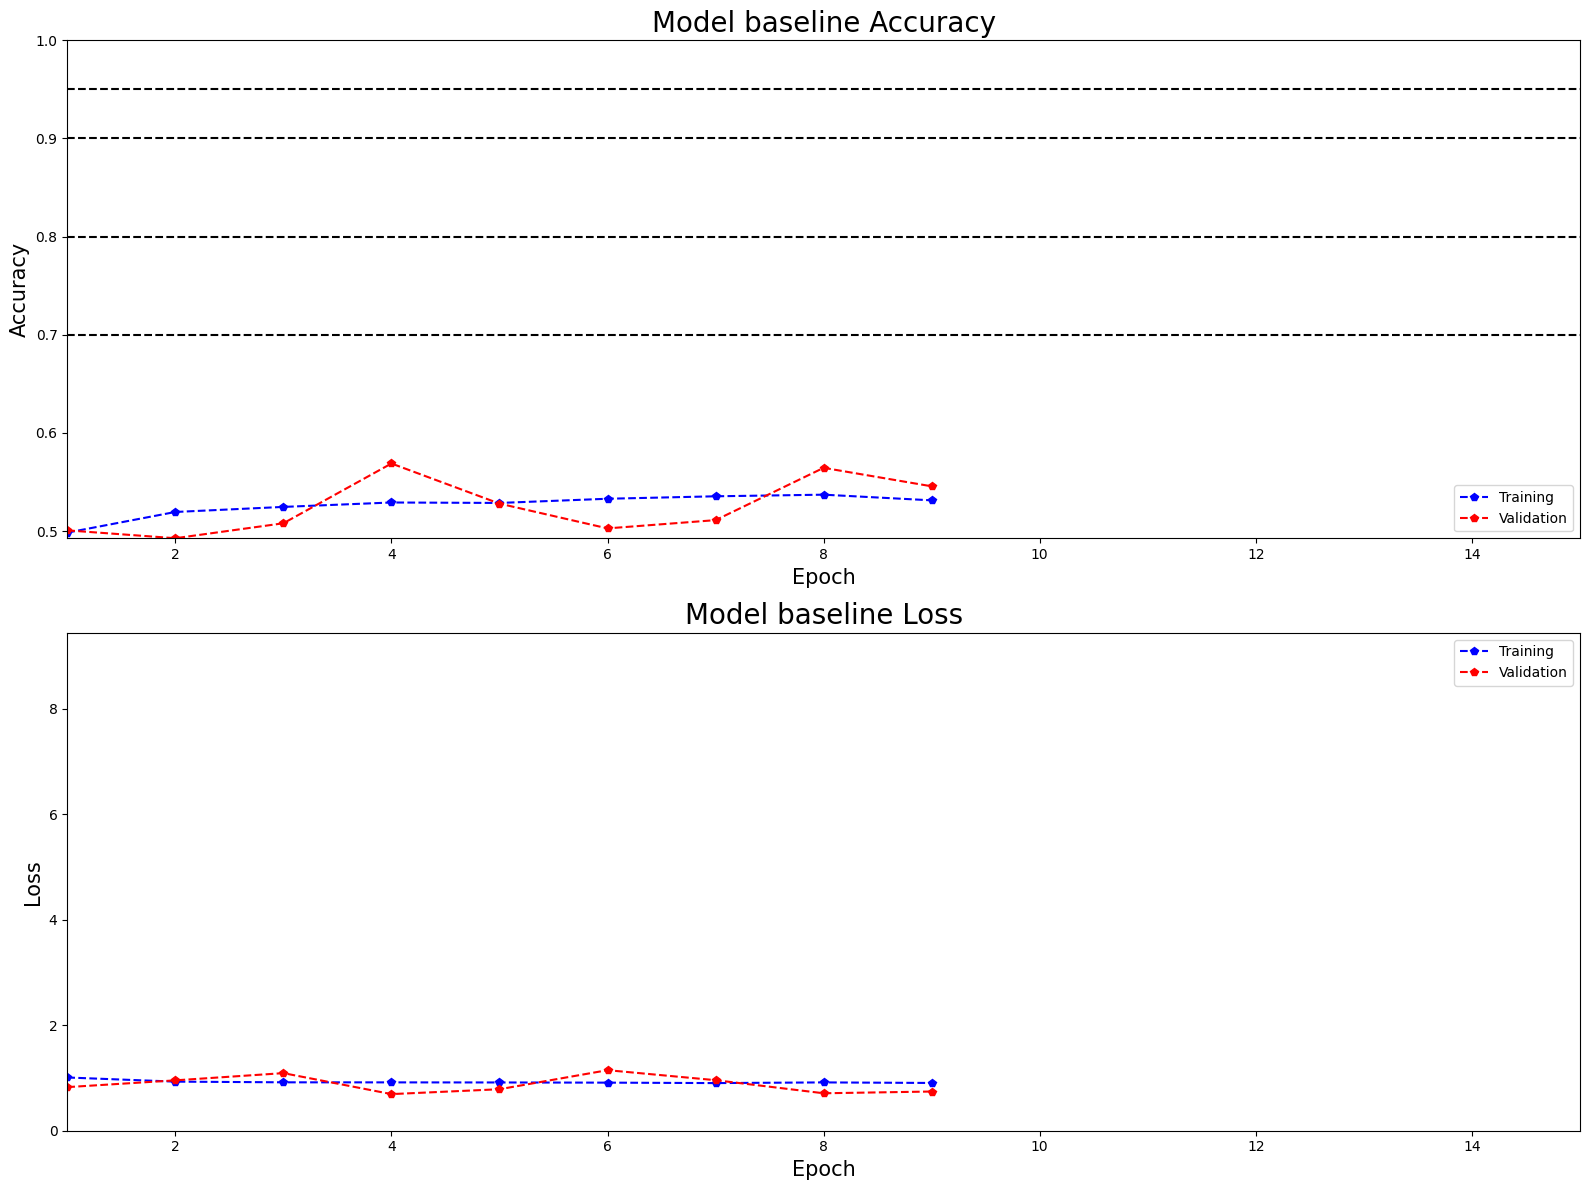

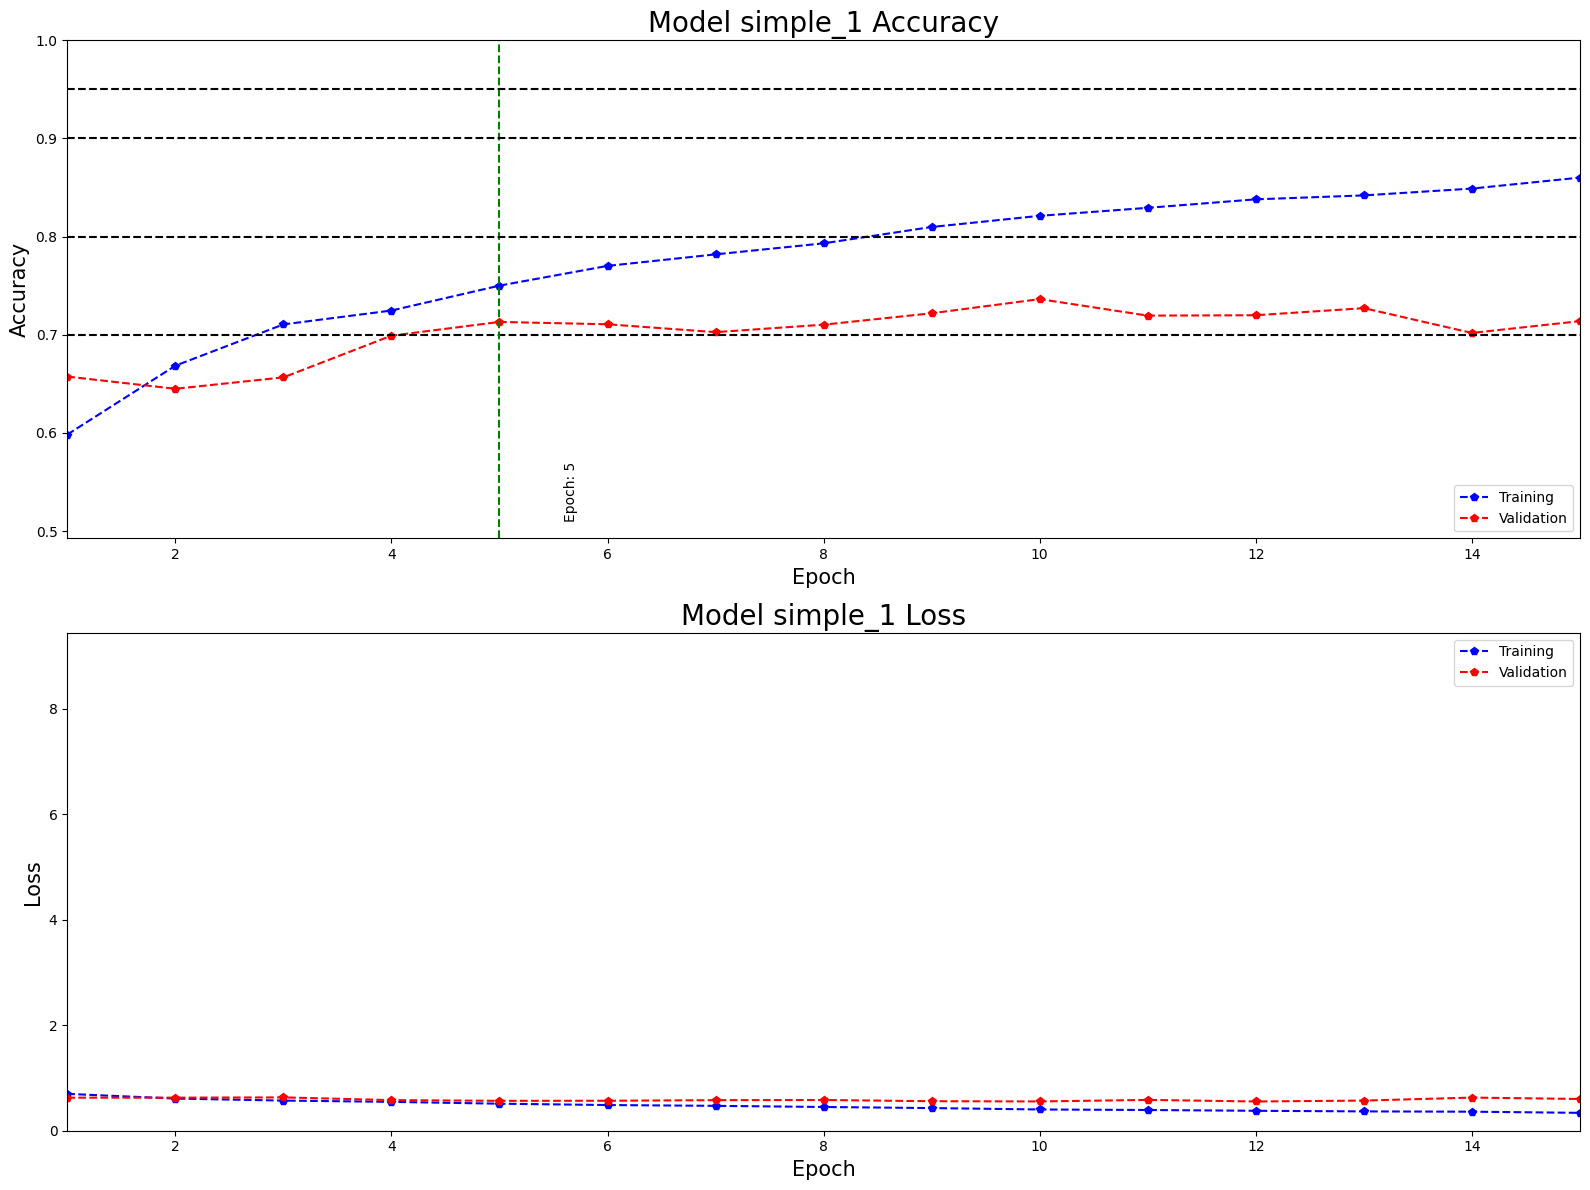

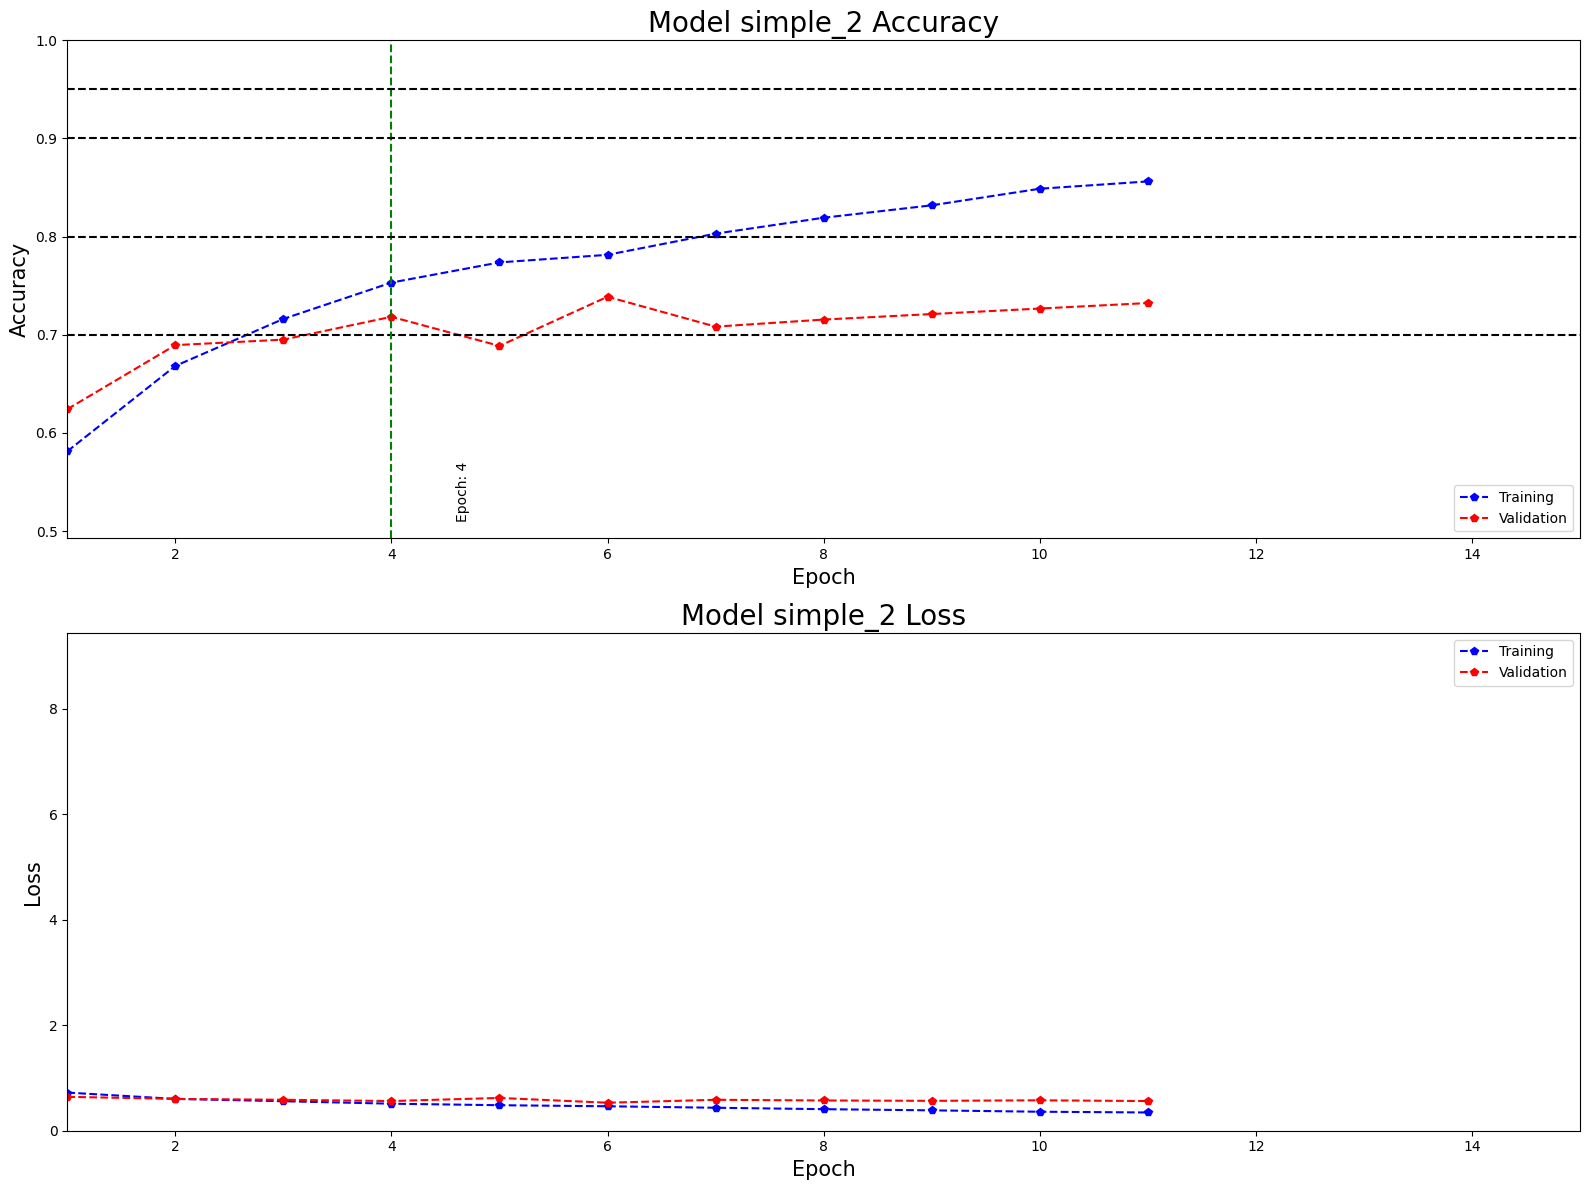

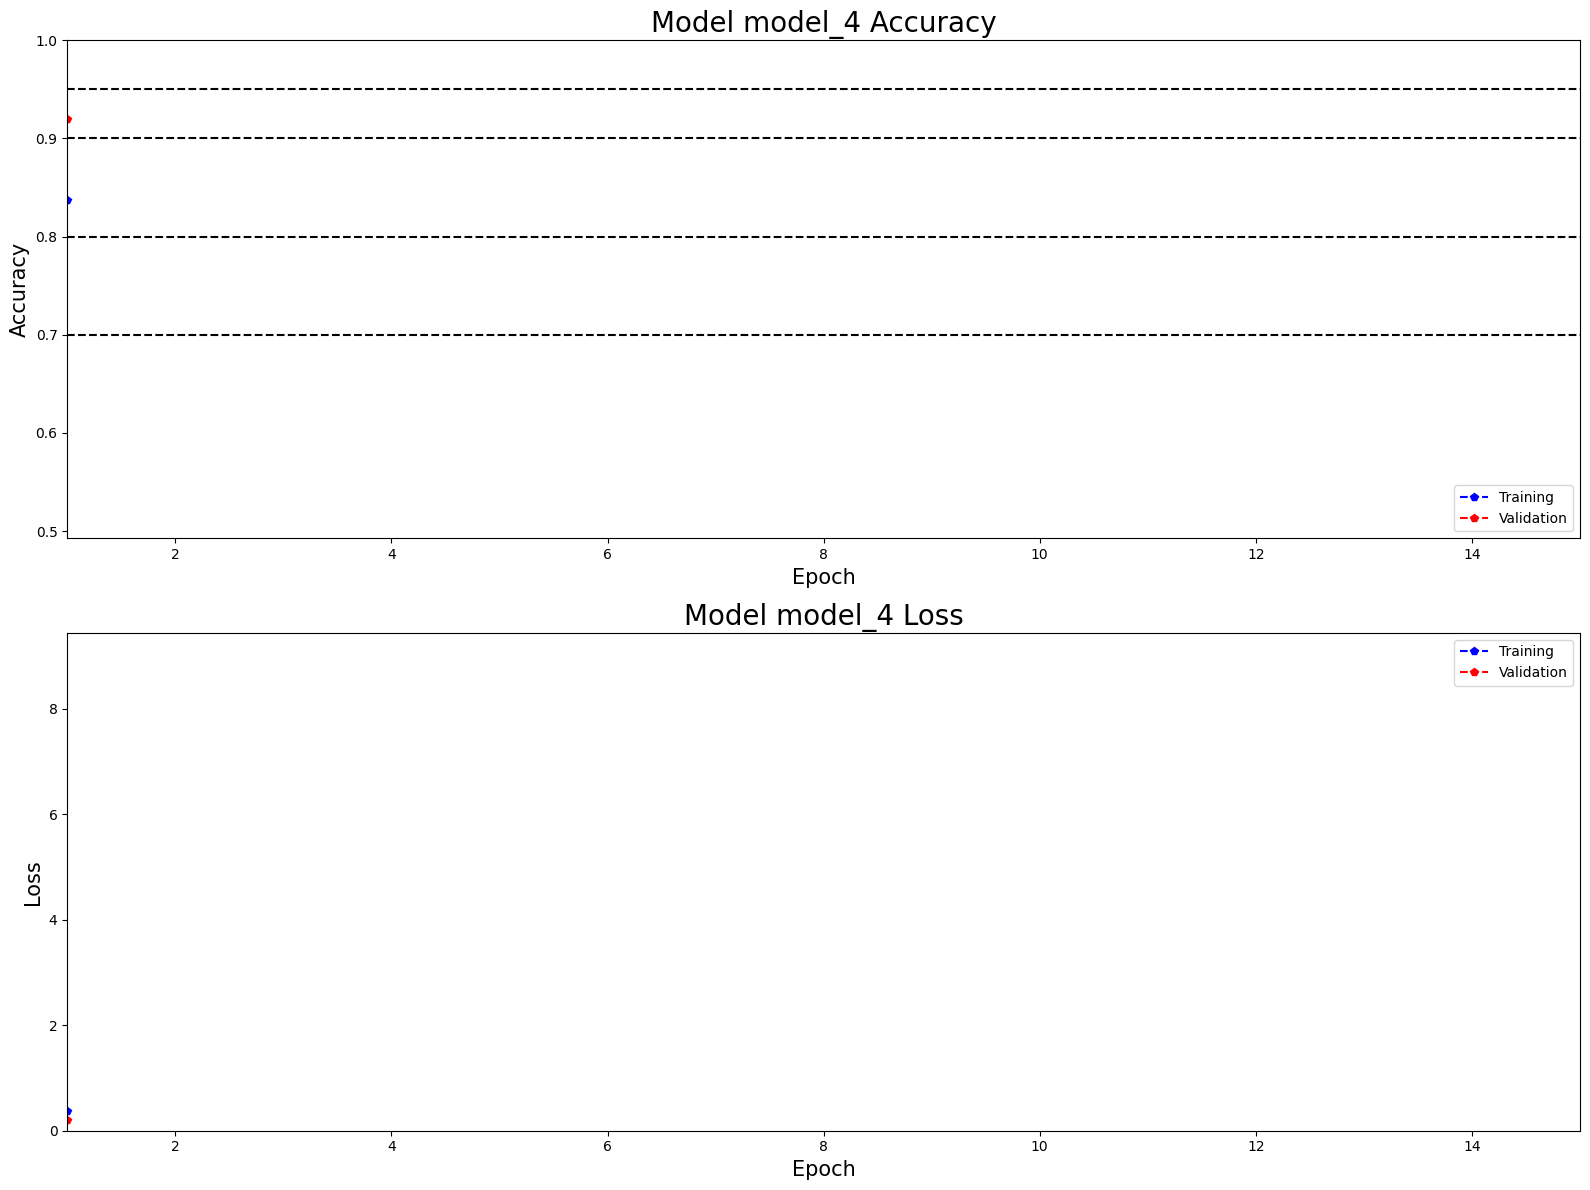

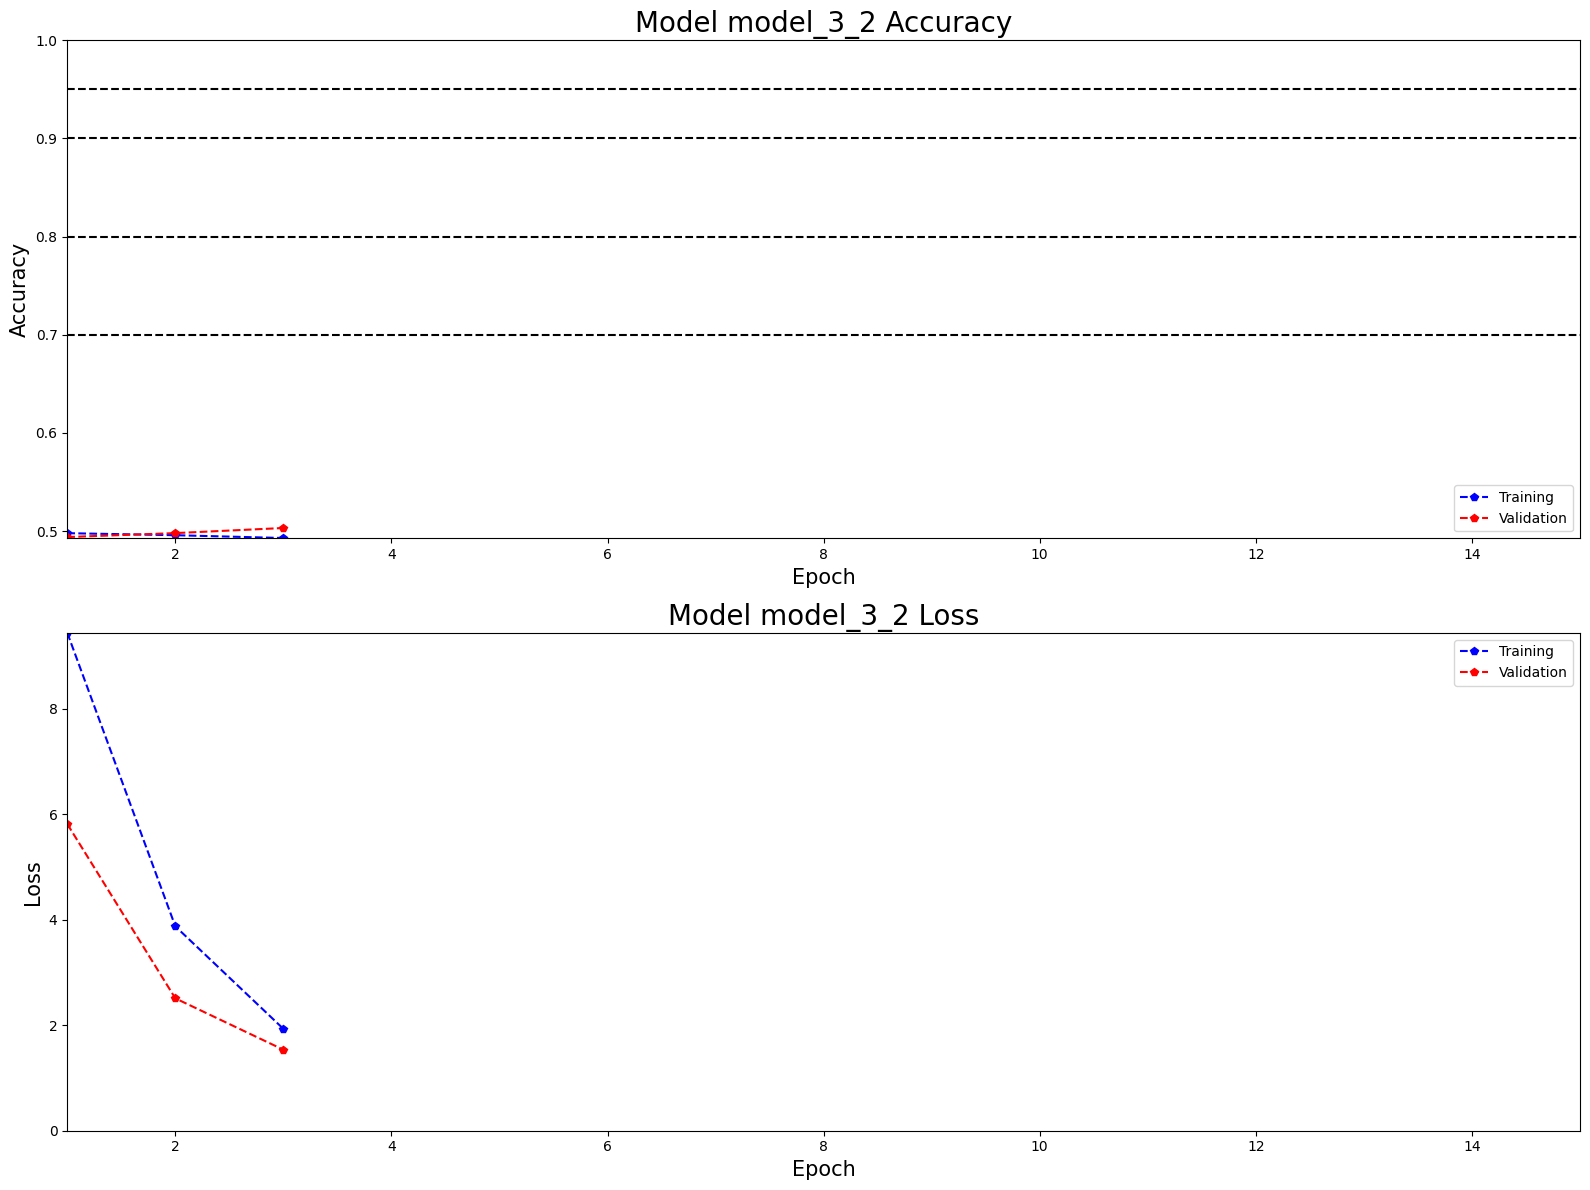

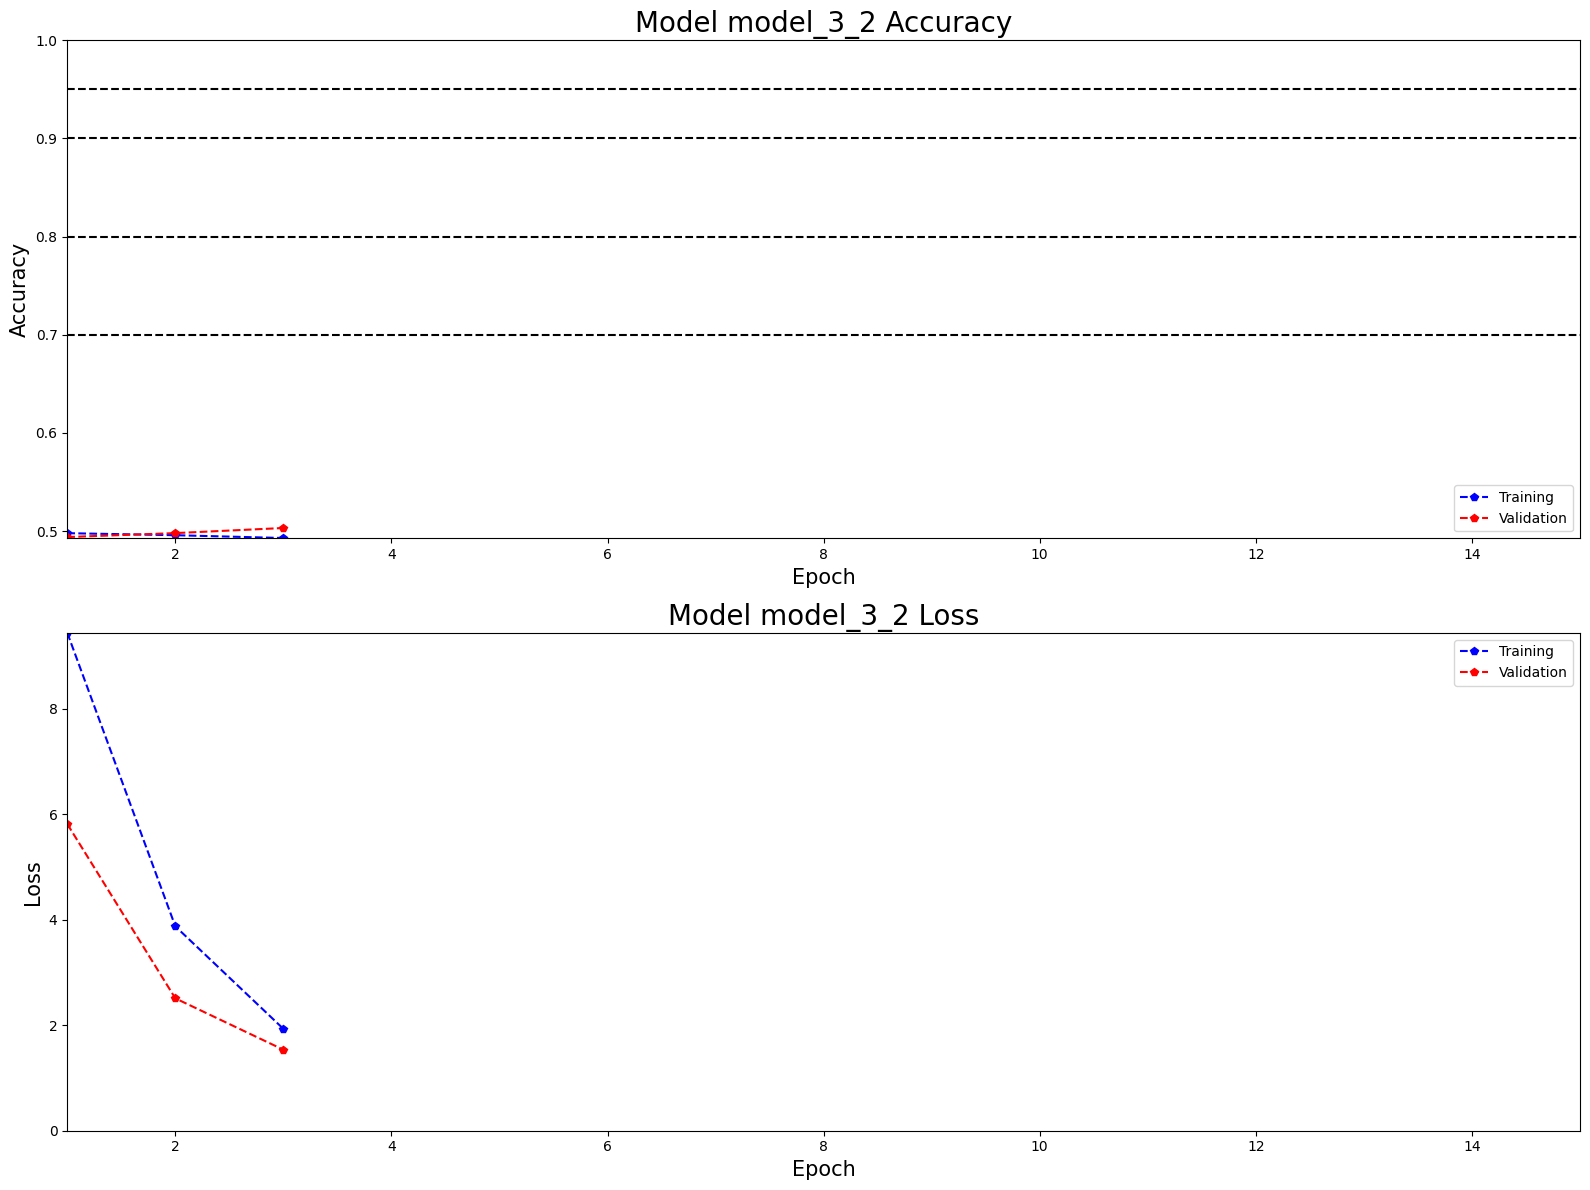

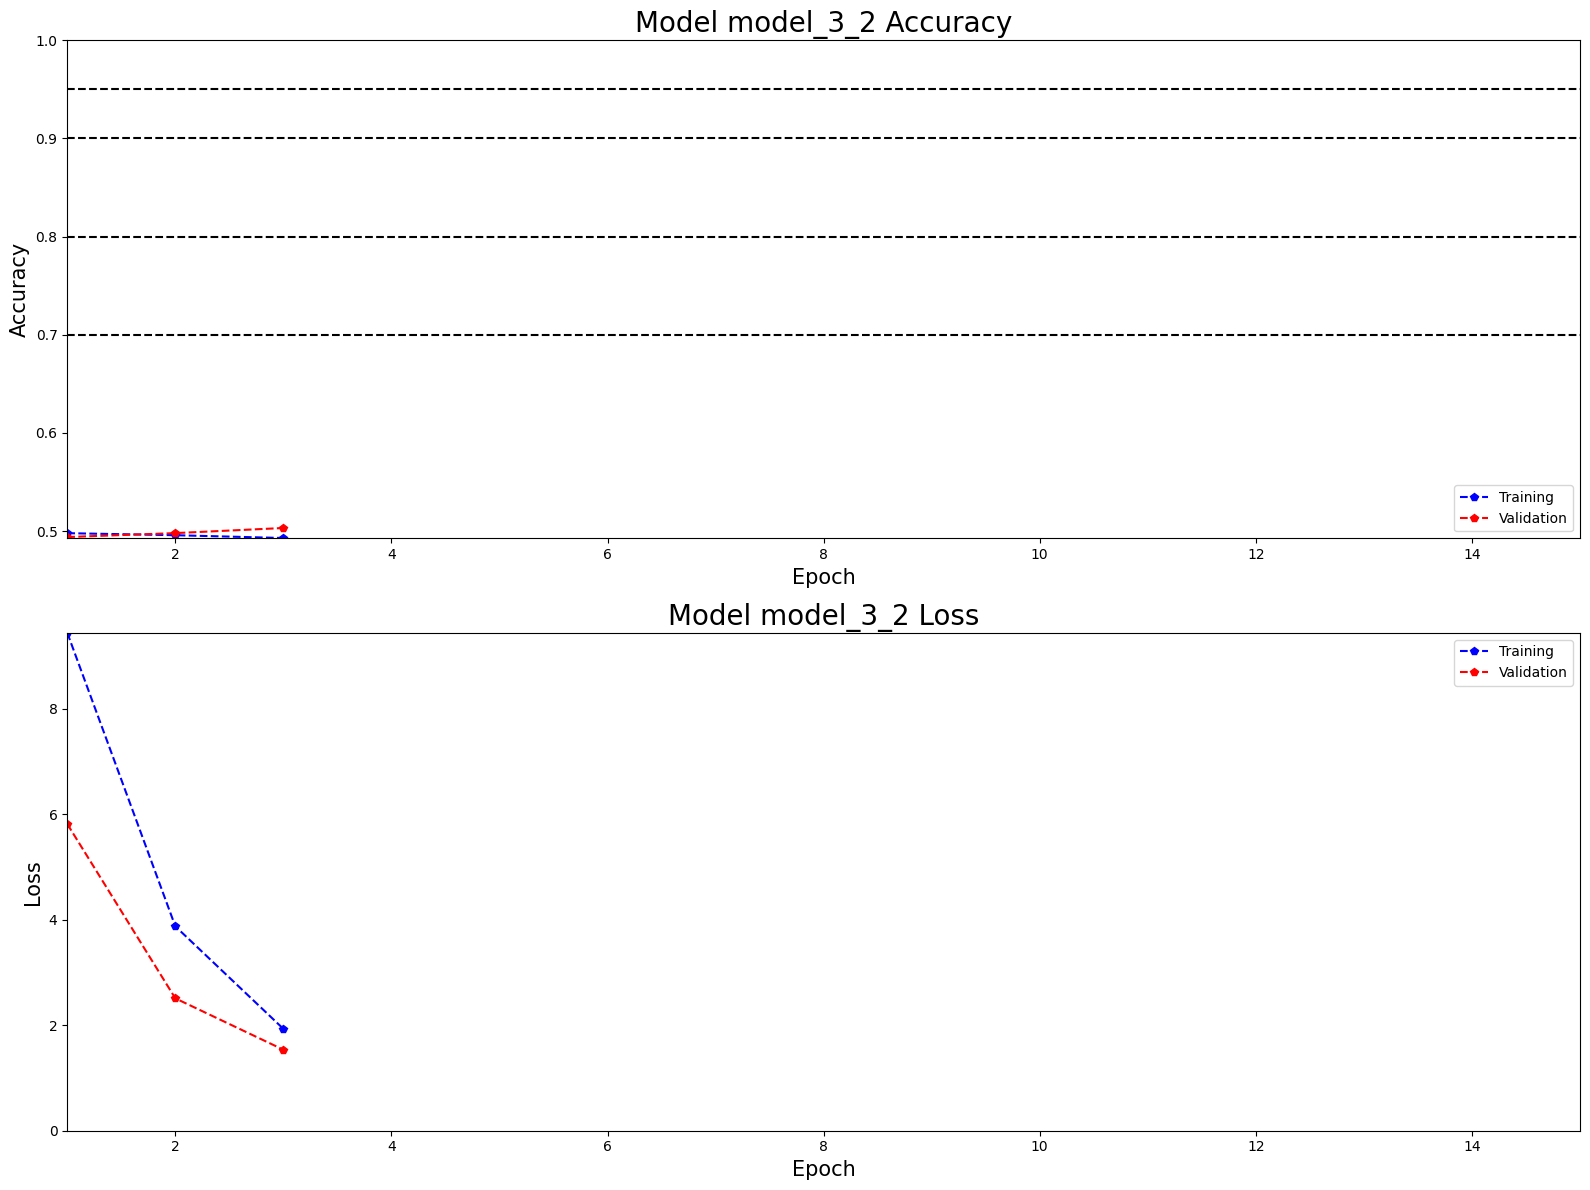

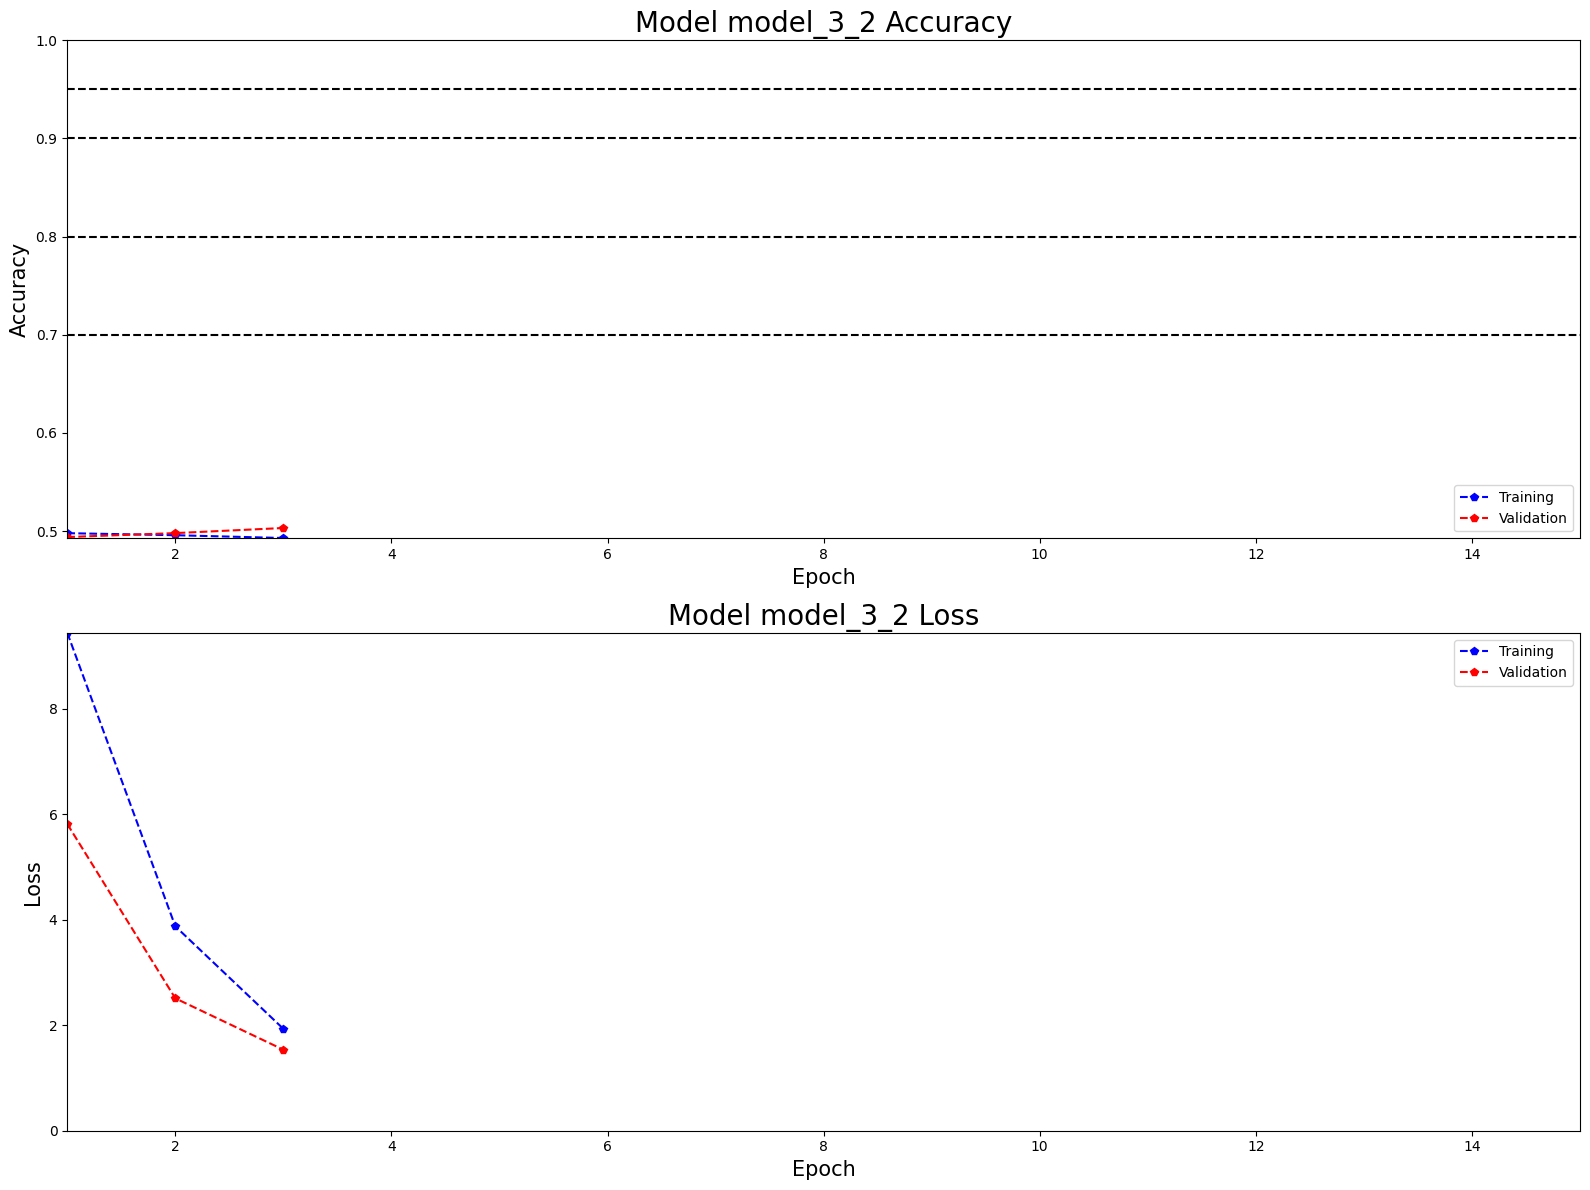

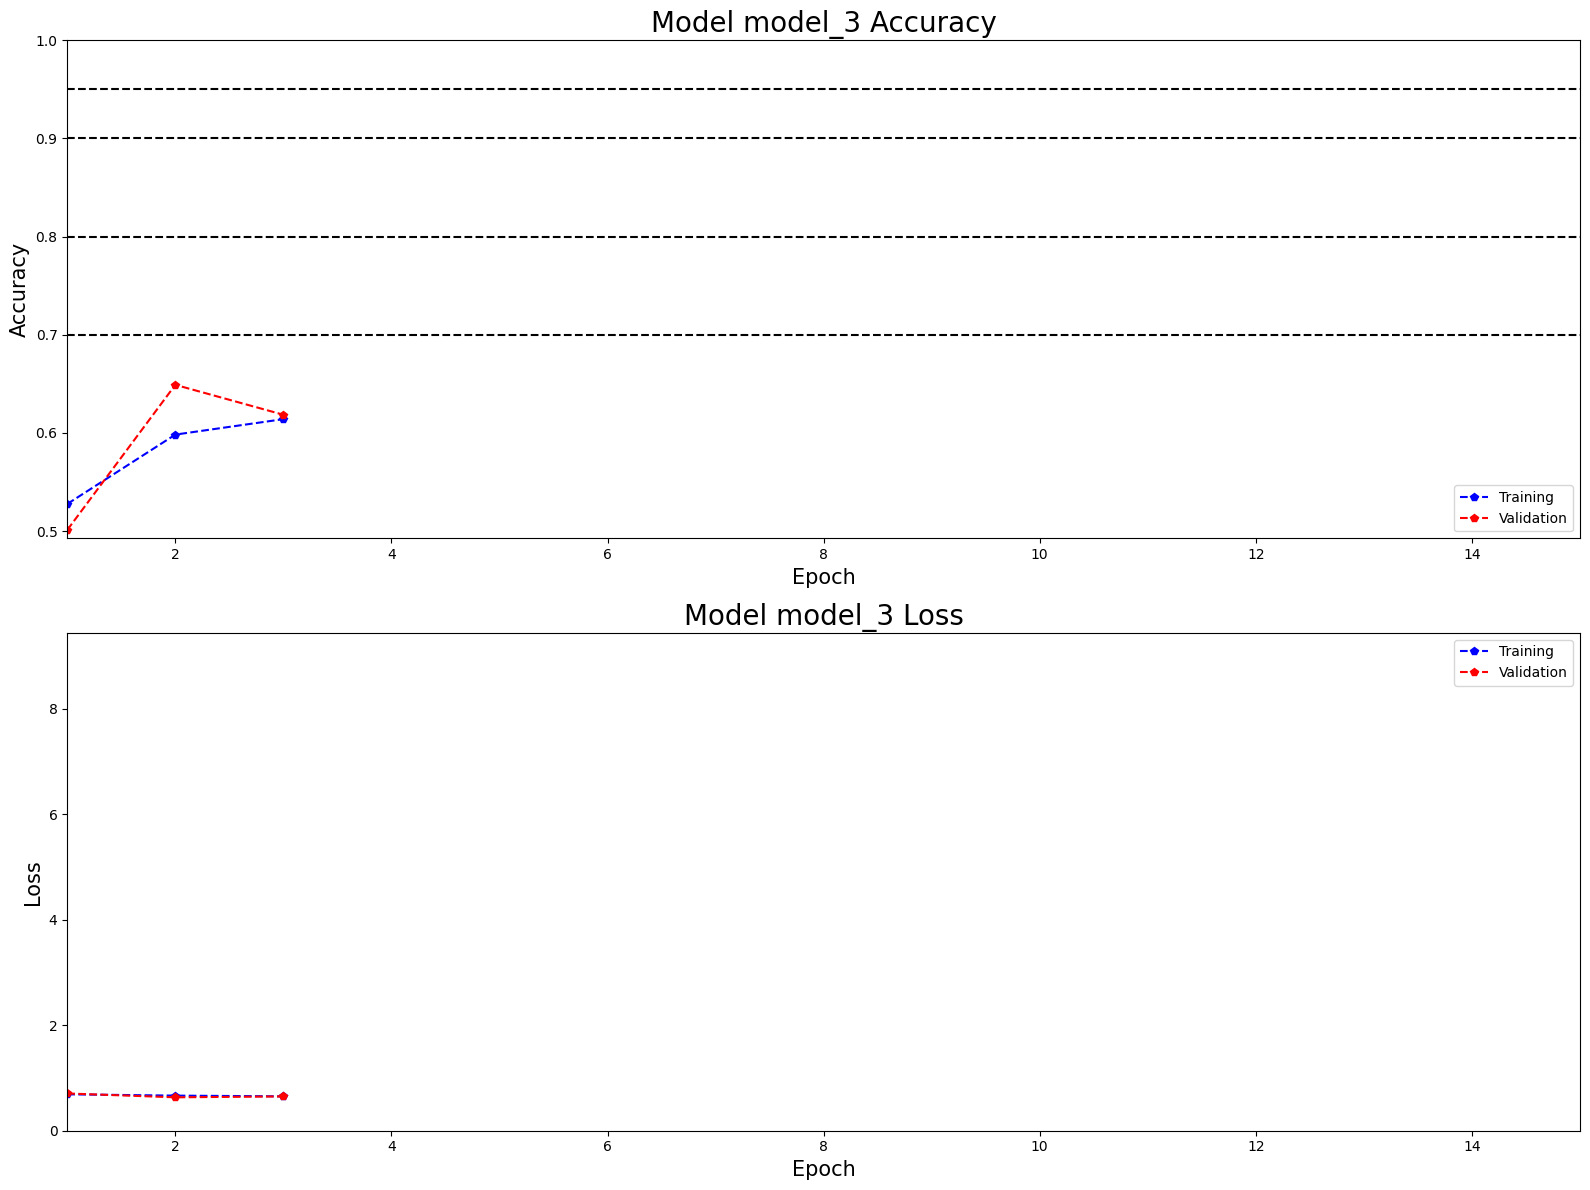

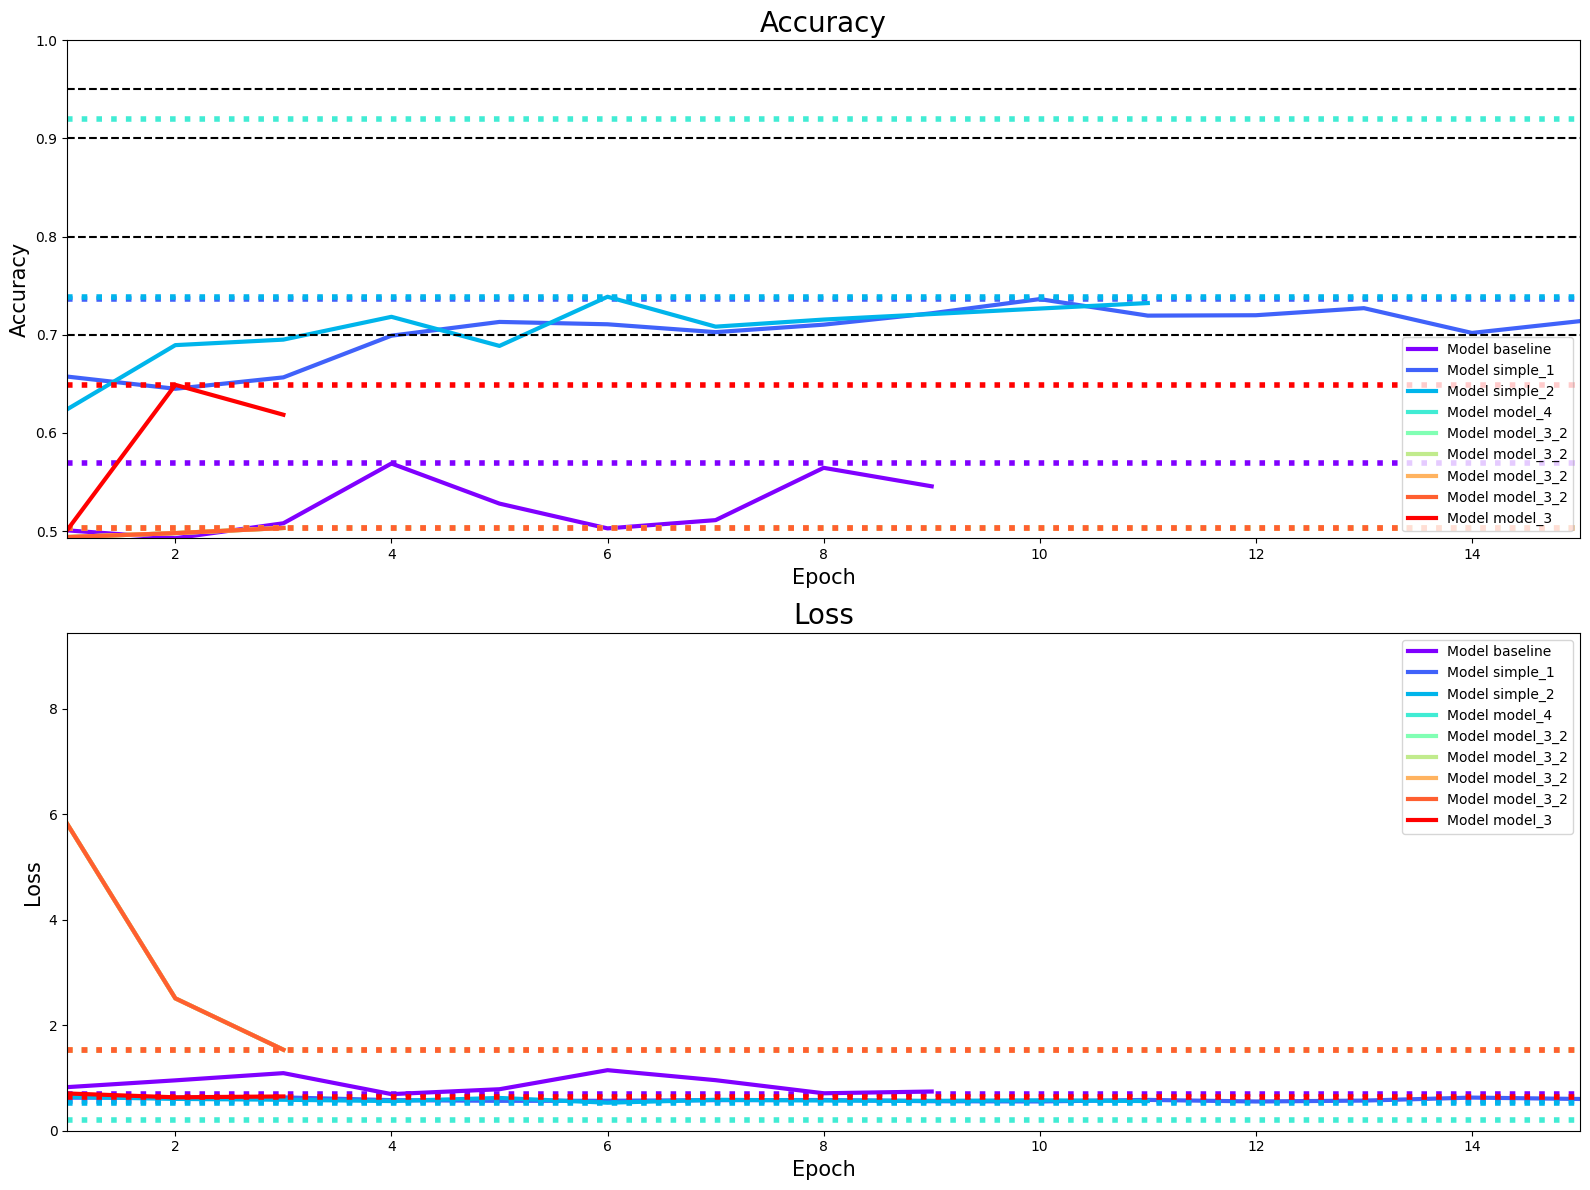

In [52]:
max_index = 0
min_accuracy = 1
max_loss = 0
colors = plt.cm.rainbow(np.linspace(0, 1, len(models)))

for model in models:
    df = pd.read_csv(f'history/history_{model}.csv', index_col=0)
    df.index += 1
    if max_index < max(df.index):
        max_index = max(df.index)
    if min_accuracy > min(df[['accuracy', 'val_accuracy']].min()):
        min_accuracy = min(df[['accuracy', 'val_accuracy']].min())
    if max_loss < max(df[['loss', 'val_loss']].max()):
        max_loss = max(df[['loss', 'val_loss']].max())
for model in models:
    df = pd.read_csv(f'history/history_{model}.csv', index_col=0)
    df.index += 1
    fig = plt.figure(figsize=(16,12))
    ax = fig.add_subplot(211)
    ax.plot(df['accuracy'], "bp--")
    ax.plot(df['val_accuracy'], "rp--")
    ax.set_title(f'Model {model} Accuracy', fontsize=20)
    ax.set_ylabel('Accuracy', fontsize=15)
    ax.set_xlabel('Epoch', fontsize=15)
    ax.set_xlim([1, max_index])
    ax.set_ylim([min_accuracy, 1])

    for milestone in (0.7, 0.8, 0.9, 0.95):
        ax.axhline(milestone, color="k", linestyle="--")
        try:
            if min(df[df['val_accuracy'] >= milestone].index) > 1:
                plt.axvline(min(df[df['val_accuracy'] >= milestone].index), color="g", linestyle="--")
                ax.text(min(df[df['val_accuracy'] >= milestone].index)+0.6, min_accuracy+0.02,
                        f'Epoch: {min(df[df["val_accuracy"] >= milestone].index)}', rotation=90)
        except:
            pass

    plt.legend(['Training', 'Validation'], loc='lower right')
    ax = fig.add_subplot(212)
    ax.plot(df['loss'], "bp--")
    ax.plot(df['val_loss'], "rp--")
    ax.set_title(f'Model {model} Loss', fontsize=20)
    ax.set_ylabel('Loss', fontsize=15)
    ax.set_xlabel('Epoch', fontsize=15)
    ax.set_xlim([1, max_index])
    ax.set_ylim([0, max_loss])
    ax.legend(['Training', 'Validation'], loc='upper right')
    plt.tight_layout()
    plt.savefig(f'charts/train_history_{model}.png', transparent=True, dpi=600)
    plt.show()

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(211)
for model, color in zip(models, colors):
    df = pd.read_csv(f'history/history_{model}.csv', index_col=0)
    df.index += 1
    ax.plot(df['val_accuracy'], label=f'Model {model}', color=color, linewidth=3)
    ax.axhline(df['val_accuracy'].max(), color=color, linestyle="dotted", linewidth=4)

ax.set_title(f'Accuracy', fontsize=20)
ax.set_ylabel('Accuracy', fontsize=15)
ax.set_xlabel('Epoch', fontsize=15)
ax.set_xlim([1, max_index])
ax.set_ylim([min_accuracy, 1])
for milestone in (0.7, 0.8, 0.9, 0.95):
    ax.axhline(milestone, color="k", linestyle="--")
plt.legend(loc='lower right')
ax = fig.add_subplot(212)
for model, color in zip(models, colors):
    df = pd.read_csv(f'history/history_{model}.csv', index_col=0)
    df.index += 1
    ax.plot(df['val_loss'], label=f'Model {model}', color=color, linewidth=3)
    ax.axhline(df['val_loss'].min(), color=color, linestyle="dotted", linewidth=4)
ax.set_title(f'Loss', fontsize=20)
ax.set_ylabel('Loss', fontsize=15)
ax.set_xlabel('Epoch', fontsize=15)
ax.set_xlim([1, max_index])
ax.set_ylim([0, max_loss])
ax.legend(loc='upper right')
plt.tight_layout()
plt.savefig(f'charts/train_history_of_each_model.png', transparent=True, dpi=600)
plt.show()